<a href="https://colab.research.google.com/github/sergetyum/Final_Check_Work/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загружаем библиотеки

In [2]:
from scipy.stats import ttest_1samp
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Загружаем файл "К ДЗ 8 АВ_Test_Results" с google диска

In [32]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel('/content/drive/MyDrive/К ДЗ 8 AB_Test_Results.xlsx')

data.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


В файле 10000 строк с User ID/Variant Name/Revenue, нулевых строк нет.

In [7]:
data.shape

(10000, 3)

Рассмотрим полную выгрузку

In [8]:
data.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [9]:
data.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [33]:
data['REVENUE'].value_counts()

0.00     9848
1.25       10
1.01        6
3.25        6
0.04        5
         ... 
2.19        1
2.14        1
17.08       1
2.00        1
2.92        1
Name: REVENUE, Length: 101, dtype: int64

In [35]:
data.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

Если тест запускался 50/50, то сплит работает корректно.

Выделим строки с ненулевой REVENUE

In [42]:
new_data = data[data['REVENUE']>0]
new_data

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9651,9928,variant,1.25
9711,6468,control,2.93
9724,5205,control,14.17
9725,702,variant,2.92


Посмотрим на группы отдельно

In [41]:
new_data[data['VARIANT_NAME']=='control'].describe()

,USER_ID,REVENUE
count,80.000000,80.000000
mean,4461.950000,8.037500
std,2826.386242,22.498124
min,124.000000,0.020000
25%,2037.500000,1.515000
50%,4327.000000,2.960000
75%,6636.750000,6.657500
max,9766.000000,196.010000


In [40]:
new_data[data['VARIANT_NAME']=='variant'].describe()

,USER_ID,REVENUE
count,72.000000,72.000000
mean,5306.958333,4.881528
std,3116.544256,9.913973
min,56.000000,0.020000
25%,2707.500000,1.245000
50%,5721.000000,2.170000
75%,7963.750000,3.972500
max,9996.000000,58.630000


Можно заметить, что максимальный чек в группе control значительно больше, чем в группе variant.

Метрика доля юзеров с покупкой

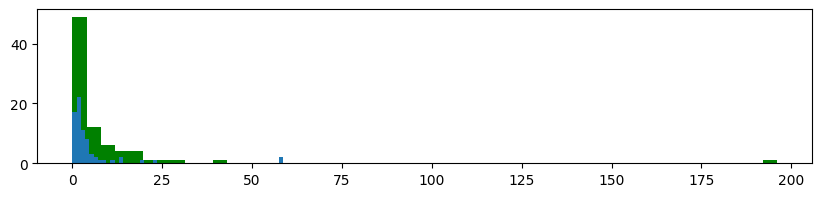

In [21]:
plt.figure(figsize=(10, 2))
control_visit_all = new_data['REVENUE'][data['VARIANT_NAME']=='control']
test_visit_all = new_data['REVENUE'][data['VARIANT_NAME']=='variant']

plt.hist(control_visit_all, color='g', bins=50)
plt.hist(test_visit_all, bins=50)

plt.show()

In [ ]:
ttest_ind(control_visit_all, test_visit_all, equal_var = False)

In [ ]:
Ttest_indResult(statistic=1.1379124979933528, pvalue=0.25760685398932337)

Т. к. pvalue > 0.05, то значимых изменений нет.

Проверим на нормальность распределения и применение статистических критериев

In [25]:
from scipy.stats import kstest
print(kstest(control_visit_all, 'norm'))
print(kstest(test_visit_all, 'norm'))

KstestResult(statistic=0.7443502263331446, pvalue=3.4769340937348253e-46, statistic_location=1.25, statistic_sign=-1)
KstestResult(statistic=0.6885669682907651, pvalue=1.5788521734348758e-34, statistic_location=1.0, statistic_sign=-1)


Т. к. значение pvalue < 0.05, то нулевую гипотезу отвергаем. Распределение не нормальное.

Для не нормального распределения применим непараметрический критерий Манн-Уитни

In [31]:
from scipy.stats import mannwhitneyu
mannwhitneyu(control_visit_all, test_visit_all)

MannwhitneyuResult(statistic=3356.0, pvalue=0.07924299810603061)

Т. к. pvalue > 0.05, то делаем вывод, что статистически значимых изменений нет.